In [ ]:
!nvidia-smi

Thu Jun 27 05:01:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


The repository for squad contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/squad.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


##Data load


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Classifying Book Plot Summaries into Multiple Genres/Book text classification with blurr

/content/drive/MyDrive/Classifying Book Plot Summaries into Multiple Genres/Book text classification with blurr


In [ ]:
df = pd.read_csv("best_books_details.csv")
df.head()

,title,url,description,genres
0,The Invisible Life of Addie LaRue,https://www.goodreads.com/book/show/50623864-the-invisible-life-of-addie-larue,"France, 1714: in a moment of desperation, a young woman makes a Faustian bargain to live forever and is cursed to be forgotten by everyone she meets.Thus begins the extraordinary life of Addie LaRue, and a dazzling adventure that will play out across centuries and continents, across history and art, as a young woman learns how far she will go to leave her mark on the world.But everything changes when, after nearly 300 years, Addie stumbles across a young man in a hidden bookstore and he remembers her name.","['Fantasy', 'Fiction', 'Romance', 'Historical Fiction', 'Adult', 'Historical', 'Magical Realism', 'LGBT', 'Contemporary', 'Paranormal']"
1,Project Hail Mary,https://www.goodreads.com/book/show/54493401-project-hail-mary,"Ryland Grace is the sole survivor on a desperate, last-chance mission—and if he fails, humanity and the earth itself will perish.Except that right now, he doesn’t know that. He can’t even remember his own name, let alone the nature of his assignment or how to complete it.All he knows is that he’s been asleep for a very, very long time. And he’s just been awakened to find himself millions of miles from home, with nothing but two corpses for company.His crewmates dead, his memories fuzzily returning, Ryland realizes that an impossible task now confronts him. Hurtling through space on this ti...","['Science Fiction', 'Fiction', 'Audiobook', 'Fantasy', 'Space', 'Adult', 'Thriller', 'Science Fiction Fantasy', 'Adventure', 'Mystery']"
2,The Midnight Library,https://www.goodreads.com/book/show/52578297-the-midnight-library,"Between life and death there is a library.When Nora Seed finds herself in the Midnight Library, she has a chance to make things right. Up until now, her life has been full of misery and regret. She feels she has let everyone down, including herself. But things are about to change.The books in the Midnight Library enable Nora to live as if she had done things differently. With the help of an old friend, she can now undo every one of her regrets as she tries to work out her perfect life. But things aren't always what she imagined they'd be, and soon her choices place the library and herself ...","['Fiction', 'Fantasy', 'Contemporary', 'Audiobook', 'Magical Realism', 'Science Fiction', 'Adult', 'Mental Health', 'Book Club', 'Adult Fiction']"
3,I'm Glad My Mom Died,https://www.goodreads.com/book/show/59364173-i-m-glad-my-mom-died,"A heartbreaking and hilarious memoir by iCarly and Sam & Cat star Jennette McCurdy about her struggles as a former child actor—including eating disorders, addiction, and a complicated relationship with her overbearing mother—and how she retook control of her life.Jennette McCurdy was six years old when she had her first acting audition. Her mother’s dream was for her only daughter to become a star, and Jennette would do anything to make her mother happy. So she went along with what Mom called “calorie restriction,” eating little and weighing herself five times a day. She endured extensive ...","['Nonfiction', 'Memoir', 'Audiobook', 'Biography', 'Autobiography', 'Mental Health', 'Adult', 'Biography Memoir', 'Contemporary', 'Humor']"
4,Piranesi,https://www.goodreads.com/book/show/50202953-piranesi,"Piranesi’s house is no ordinary building: its rooms are infinite, its corridors endless, its walls are lined with thousands upon thousands of statues, each one different from all the others. Within the labyrinth of halls an ocean is imprisoned; waves thunder up staircases, rooms are flooded in an instant. But Piranesi is not afraid; he understands the tides as he understands the pattern of the labyrinth itself. He lives to explore the house.There is one other person in the house—a man called The Other, who visits Piranesi twice a week and asks for help with research into A Great and Secret...","['Fantasy', 'Fiction', 'Mystery', 'Magica

##Data Preprocessing

In [ ]:
df.shape

(24846, 4)

In [ ]:
df.isna().sum()

title           0
url             0
description    92
genres          0
dtype: int64

In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(24754, 4)

In [ ]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 910
{'Fantasy': 7267, 'Fiction': 17758, 'Romance': 5297, 'Historical Fiction': 5224, 'Adult': 5041, 'Historical': 4608, 'Magical Realism': 576, 'LGBT': 1085, 'Contemporary': 5009, 'Paranormal': 2038, 'Science Fiction': 3065, 'Audiobook': 7477, 'Space': 385, 'Thriller': 3035, 'Science Fiction Fantasy': 2262, 'Adventure': 3359, 'Mystery': 4922, 'Mental Health': 396, 'Book Club': 676, 'Adult Fiction': 2083, 'Nonfiction': 5053, 'Memoir': 1662, 'Biography': 2243, 'Autobiography': 793, 'Biography Memoir': 1295, 'Humor': 2448, 'Mythology': 501, 'Literary Fiction': 2827, 'Dragons': 321, 'Fantasy Romance': 213, 'New Adult': 454, 'Magic': 1996, 'Young Adult': 4719, 'Race': 447, 'Dystopia': 897, 'Teen': 955, 'Young Adult Fantasy': 678, 'Urban Fantasy': 1362, 'Angels': 113, 'Dark': 283, 'Abuse': 159, 'Feminism': 643, 'Contemporary Romance': 749, 'Chick Lit': 1135, 'Books About Books': 272, 'Love': 162, 'College': 137, 'Fae': 218, 'Family': 962, 'Coming Of Age': 623, 'Historical F

In [ ]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

(759, ['Fantasy Romance', 'Angels', 'Abuse', 'Love', 'College'])

In [ ]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

In [ ]:
df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(24105, 4)

In [ ]:
df.head()

,title,url,description,genres
0,The Invisible Life of Addie LaRue,https://www.goodreads.com/book/show/50623864-the-invisible-life-of-addie-larue,"France, 1714: in a moment of desperation, a young woman makes a Faustian bargain to live forever and is cursed to be forgotten by everyone she meets.Thus begins the extraordinary life of Addie LaRue, and a dazzling adventure that will play out across centuries and continents, across history and art, as a young woman learns how far she will go to leave her mark on the world.But everything changes when, after nearly 300 years, Addie stumbles across a young man in a hidden bookstore and he remembers her name.","['Fantasy', 'Fiction', 'Romance', 'Historical Fiction', 'Adult', 'Historical', 'Magical Realism', 'LGBT', 'Contemporary', 'Paranormal']"
1,Project Hail Mary,https://www.goodreads.com/book/show/54493401-project-hail-mary,"Ryland Grace is the sole survivor on a desperate, last-chance mission—and if he fails, humanity and the earth itself will perish.Except that right now, he doesn’t know that. He can’t even remember his own name, let alone the nature of his assignment or how to complete it.All he knows is that he’s been asleep for a very, very long time. And he’s just been awakened to find himself millions of miles from home, with nothing but two corpses for company.His crewmates dead, his memories fuzzily returning, Ryland realizes that an impossible task now confronts him. Hurtling through space on this ti...","['Science Fiction', 'Fiction', 'Audiobook', 'Fantasy', 'Space', 'Adult', 'Thriller', 'Science Fiction Fantasy', 'Adventure', 'Mystery']"
2,The Midnight Library,https://www.goodreads.com/book/show/52578297-the-midnight-library,"Between life and death there is a library.When Nora Seed finds herself in the Midnight Library, she has a chance to make things right. Up until now, her life has been full of misery and regret. She feels she has let everyone down, including herself. But things are about to change.The books in the Midnight Library enable Nora to live as if she had done things differently. With the help of an old friend, she can now undo every one of her regrets as she tries to work out her perfect life. But things aren't always what she imagined they'd be, and soon her choices place the library and herself ...","['Fiction', 'Fantasy', 'Contemporary', 'Audiobook', 'Magical Realism', 'Science Fiction', 'Adult', 'Mental Health', 'Book Club', 'Adult Fiction']"
3,I'm Glad My Mom Died,https://www.goodreads.com/book/show/59364173-i-m-glad-my-mom-died,"A heartbreaking and hilarious memoir by iCarly and Sam & Cat star Jennette McCurdy about her struggles as a former child actor—including eating disorders, addiction, and a complicated relationship with her overbearing mother—and how she retook control of her life.Jennette McCurdy was six years old when she had her first acting audition. Her mother’s dream was for her only daughter to become a star, and Jennette would do anything to make her mother happy. So she went along with what Mom called “calorie restriction,” eating little and weighing herself five times a day. She endured extensive ...","['Nonfiction', 'Memoir', 'Audiobook', 'Biography', 'Autobiography', 'Mental Health', 'Adult', 'Biography Memoir', 'Contemporary', 'Humor']"
4,Piranesi,https://www.goodreads.com/book/show/50202953-piranesi,"Piranesi’s house is no ordinary building: its rooms are infinite, its corridors endless, its walls are lined with thousands upon thousands of statues, each one different from all the others. Within the labyrinth of halls an ocean is imprisoned; waves thunder up staircases, rooms are flooded in an instant. But Piranesi is not afraid; he understands the tides as he understands the pattern of the labyrinth itself. He lives to explore the house.There is one other person in the house—a man called The Other, who visits Piranesi twice a week and asks for help with research into A Great and Secret...","['Fantasy', 'Fiction', 'Mystery', 'Magica

In [ ]:
df.to_csv('preprocessed_best_books_details_data.csv', index=False)

##Data Processing

In [ ]:
df['revised_genres'] = revised_genre_list

In [ ]:
df.tail()

,title,url,description,genres,revised_genres
24100,Theatre,https://www.goodreads.com/book/show/31326.Theatre,"In Theatre, W. Somerset Maugham–the author of the classic novels Of Human Bondage and Up at the Villa–introduces us to Julia Lambert, a woman of breathtaking poise and talent whose looks have stood by her forty-six years. She is a star UK stage actress–-so good, in fact, that perhaps she never stops acting.It seems that noting can ruffle her satin feathers, until a quiet stranger challenges Julia's very sense of self. As a result, she will endure rejection for the first time, her capacity as a mother will be affronted, and her ability to put on whatever face she desired for her public will...","['Classics', 'Fiction', 'British Literature', 'Romance', '20th Century', 'Novels', 'Literature', 'Theatre', 'English Literature', 'Drama']","[Classics, Fiction, British Literature, Romance, 20th Century, Novels, Literature, Theatre, Drama]"
24101,The Complete Sherlock Holmes,https://www.goodreads.com/book/show/188572.The_Complete_Sherlock_Holmes,"A study in scarlet --The sign of four --Adventures of Sherlock Holmes : A scandal in Bohemia ; The red-headed league ; A case of identity ; The Boscombe Valley mystery ; The five orange pips ; The man with the twisted lip ; The adventure of the blue carbuncle ; The adventure of the speckled band ; The adventure of the engineer's thumb ; The adventure of the noble bachelor ; The adventure of the beryl coronet ; The adventure of the copper beeches --Memoirs of Sherlock Holmes : Silver blaze ; The yellow face ; The stock-broker's clerk ; The ""Gloria Scott"" ; The Musgrave ritual ; The Reigate ...","['Classics', 'Mystery', 'Fiction', 'Crime', 'Short Stories', 'Detective', 'Audiobook', 'Literature', 'Mystery Thriller', 'Historical Fiction']","[Classics, Mystery, Fiction, Crime, Short Stories, Detective, Audiobook, Literature, Mystery Thriller, Historical Fiction]"
24102,Hudson Taylor's Spiritual Secret,https://www.goodreads.com/book/show/313619.Hudson_Taylor_s_Spiritual_Secret,"Discover Hudson Taylor, a pioneer missionary to China, who suffered tribulation, hardship, poverty, and misunderstanding. But at his heart, he loved the Chinese people and learned through his misfortunes to trust God completely. 'HUDSON TAYLOR'S SPIRITUAL SECRET' is a stirring biography that challenges you to live a life of faith.RUNNING TIME ⇒ 7hrs. and 16mins.Public Domain (P)2011 christianaudio.com","['Biography', 'Christian', 'Nonfiction', 'Christianity', 'History', 'Christian Living', 'Faith', 'China', 'Theology', 'Religion']","[Biography, Christian, Nonfiction, Christianity, History, Faith, Theology, Religion]"
24103,The Historical Novel,https://www.goodreads.com/book/show/189609.The_Historical_Novel,"""Concentrating primarily on the 19th century, Lukacs offers brilliant reflections on Scott, Hugo, Tolstoy, and Flaubert, the methods of creating a feeling of historical reality, the tradition of epic, the use of the past by the rising bourgeoisie, the negative influence of naturalism, and the place of overt ideology."" Washington Post Book World","['Nonfiction', 'Criticism', 'Philosophy', 'Literary Criticism', 'Theory', 'History', 'Lit Crit', 'Academic', 'Literature', '20th Century']","[Nonfiction, Philosophy, Theory, History, Literature, 20th Century]"
24104,Black Narcissus,https://www.goodreads.com/book/show/11101233-black-narcissus,"In the days when it was the General's 'harem' palace, ladies with their retinues and rich clothes could be seen walking on the high windy terraces. At night, music floated out over villages and gorges far into the early hours. Now the General's son has bestowed it upon the disciplined Sisters of Mary. Beginning work in the orchards and opening a school and a dispensary for the mountain people, the small band of Sisters are depended for help on the English agent, Mr Dean. But his charm and insolent candour are disconcerting. When he says bluntly 'This is no place for a nunnery', it 

In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 151
{'Fantasy': 7267, 'Fiction': 17758, 'Romance': 5297, 'Historical Fiction': 5224, 'Adult': 5041, 'Historical': 4608, 'Magical Realism': 576, 'LGBT': 1085, 'Contemporary': 5009, 'Paranormal': 2038, 'Science Fiction': 3065, 'Audiobook': 7477, 'Space': 385, 'Thriller': 3035, 'Science Fiction Fantasy': 2262, 'Adventure': 3359, 'Mystery': 4922, 'Mental Health': 396, 'Book Club': 676, 'Adult Fiction': 2083, 'Nonfiction': 5053, 'Memoir': 1662, 'Biography': 2243, 'Autobiography': 793, 'Biography Memoir': 1295, 'Humor': 2448, 'Mythology': 501, 'Literary Fiction': 2827, 'Dragons': 321, 'New Adult': 454, 'Magic': 1996, 'Young Adult': 4719, 'Race': 447, 'Dystopia': 897, 'Teen': 955, 'Young Adult Fantasy': 678, 'Urban Fantasy': 1362, 'Dark': 283, 'Feminism': 643, 'Contemporary Romance': 749, 'Chick Lit': 1135, 'Books About Books': 272, 'Family': 962, 'Coming Of Age': 623, 'Mystery Thriller': 2601, 'Novels': 4949, 'Horror': 1636, 'Gothic': 290, 'Suspense': 1927, 'Crime': 2817, '

In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
# This is necessary since all genres have the potential to appear in the predictions for multilabel classification.
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:23]

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]

In [ ]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,title,url,description,genres,revised_genres,genre_cat_list
0,The Invisible Life of Addie LaRue,https://www.goodreads.com/book/show/50623864-the-invisible-life-of-addie-larue,"France, 1714: in a moment of desperation, a young woman makes a Faustian bargain to live forever and is cursed to be forgotten by everyone she meets.Thus begins the extraordinary life of Addie LaRue, and a dazzling adventure that will play out across centuries and continents, across history and art, as a young woman learns how far she will go to leave her mark on the world.But everything changes when, after nearly 300 years, Addie stumbles across a young man in a hidden bookstore and he remembers her name.","['Fantasy', 'Fiction', 'Romance', 'Historical Fiction', 'Adult', 'Historical', 'Magical Realism', 'LGBT', 'Contemporary', 'Paranormal']","[Fantasy, Fiction, Romance, Historical Fiction, Adult, Historical, Magical Realism, LGBT, Contemporary, Paranormal]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,Project Hail Mary,https://www.goodreads.com/book/show/54493401-project-hail-mary,"Ryland Grace is the sole survivor on a desperate, last-chance mission—and if he fails, humanity and the earth itself will perish.Except that right now, he doesn’t know that. He can’t even remember his own name, let alone the nature of his assignment or how to complete it.All he knows is that he’s been asleep for a very, very long time. And he’s just been awakened to find himself millions of miles from home, with nothing but two corpses for company.His crewmates dead, his memories fuzzily returning, Ryland realizes that an impossible task now confronts him. Hurtling through space on this ti...","['Science Fiction', 'Fiction', 'Audiobook', 'Fantasy', 'Space', 'Adult', 'Thriller', 'Science Fiction Fantasy', 'Adventure', 'Mystery']","[Science Fiction, Fiction, Audiobook, Fantasy, Space, Adult, Thriller, Science Fiction Fantasy, Adventure, Mystery]","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,The Midnight Library,https://www.goodreads.com/book/show/52578297-the-midnight-library,"Between life and death there is a library.When Nora Seed finds herself in the Midnight Library, she has a chance to make things right. Up until now, her life has been full of misery and regret. She feels she has let everyone down, including herself. But things are about to change.The books in the Midnight Library enable Nora to live as if she had done things differently. With the help of an old friend, she can now undo every one of her regrets as she tries to work out her perfect life. But things aren't always what she imagined they'd be, and soon her choices place the library and herself ...","['Fiction', 'Fantasy', 'Contemporary', 'Audiobook', 'Magical Realism', 'Science Fiction', 'Adult', 'Mental Health', 'Book Club', 'Adult Fiction']","[Fiction, Fantasy, Contemporary, Audiobook, Magical Realism, Science Fiction, Adult, Mental Health, Book Club, Adult Fiction]","[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,I'm Glad My Mom Died,https://www.goodreads.com/book/show/59364173-i-m-glad-my-mom-died,"A heartbreaking and hilarious memoir by iCarly and Sam & Cat star Jennette McCurdy about her struggles as a former child actor—includ

In [ ]:
labels = list(encode_genre_types.keys())

##Dataloaders and Model Setup

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-multilabel-book-text-classifier.pkl")

In [ ]:
dls.vocab

['Fantasy', 'Fiction', 'Romance', 'Historical Fiction', 'Adult', 'Historical', 'Magical Realism', 'LGBT', 'Contemporary', 'Paranormal', 'Science Fiction', 'Audiobook', 'Space', 'Thriller', 'Science Fiction Fantasy', 'Adventure', 'Mystery', 'Mental Health', 'Book Club', 'Adult Fiction', 'Nonfiction', 'Memoir', 'Biography', 'Autobiography', 'Biography Memoir', 'Humor', 'Mythology', 'Literary Fiction', 'Dragons', 'New Adult', 'Magic', 'Young Adult', 'Race', 'Dystopia', 'Teen', 'Young Adult Fantasy', 'Urban Fantasy', 'Dark', 'Feminism', 'Contemporary Romance', 'Chick Lit', 'Books About Books', 'Family', 'Coming Of Age', 'Mystery Thriller', 'Novels', 'Horror', 'Gothic', 'Suspense', 'Crime', 'Queer', 'Graphic Novels', 'Comics', 'British Literature', 'Murder Mystery', 'Music', 'Time Travel', 'Speculative Fiction', 'History', 'Sociology', 'African American', 'American History', 'Sports', 'Animals', 'Space Opera', 'Vampires', 'High Fantasy', 'Travel', 'Canada', 'True Crime', 'Retellings', 'Afri

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Πρόκειται για μια ιστορική επισκόπηση της νεοελληνικής λογοτεχνίας από τη βυζαντινή περίοδο ώς τις μέρες μας.Στο πρώτο μέρος παρουσιάζεται η λογοτεχνική δημιουργία από τις πρώτες αρχές μέχρι τον 18ο αιώνα: η λογοτεχνία πριν από την Άλωση (11ος-15ος αιώνας) και μετά την Άλωση (15ος-17ος αιώνας) ιδίως στην Κρήτη και την Κύπρο, καθώς και το έργο των λογίων της Διασποράς. Ιδιαίτερα κεφάλαια αφιερώνονται στη λογοτεχνική ακμή στην Κρήτη τον 17ο αιώνα και στο δημοτικό τραγούδι",[History]
1,"Нового роману від Юрія Андруховича чекали вже давно, дехто навіть і чекати кинув. Утім, мабуть, ніхто не сподівався такого незвичного Андруховича – хіба тільки ті, хто усвідомлював, що виводити Андруховичеву прозу треба вже не так від бубабістської трилогії, як від ""Центрально-східної ревізії"" – строгого, піднесеного й скорботного роману, замаскованого під ""есей"". Окремі фраґменти ""Дванадцяти обручів"", опубліковані в ""Потязі"" та ""Критиці"", тіл","[Fiction, Novels]"
2,"Όταν, το 1931, κυκλοφόρησε για πρώτη φορά το μυθιστόρημα Φάμπιαν του Έριχ Κέστνερ, η εθνικοσοσιαλιστική εφημερίδα Volkischer Beobachter έσπευσε να το χαρακτηρίσει «εκδοτικό σκουπίδι». Ο κριτικός που υπέγραφε το κείμενο ήταν, φυσικά, ανώνυμος και ο χαρακτηρισμός αποτέλεσε, και αποτελεί μέχρι σήμερα, τίτλο τιμής. Άλλωστε, λίγους μόλις μήνες αργότερα, το βιβλίο είχε πουλήσει πάνω από 30.000 αντίτυπα, σημειώνοντας μεγάλη επιτυχία.Κι όμως, το αριστούργημα του Κέστνερ δεν ευτύχησε","[Fiction, Historical Fiction, Novels, Literature, Roman, School, 20th Century, Germany, Classics, German Literature]"
3,"دانۀ زیر برف علی‌القاعده باید جلدِ دوّم ""نان و شراب"" باشد، چه از همان‌جایی‌که نان و شراب قطع می‌شود؛ فرار ""پیترو اسپینا"" در کوهی‌برف‌پوشیده و کشته‌شدنِ ""کریستینا"" توسّطِ گرگ‌ها آغاز می‌شود. نان و شراب داستانِ مبارزه‌ی یک‌سوسیالیست است علیهِ فاشیسم. مأمورین ِ دولتی در تعقیب‌اش هستند. اگر گرفتار شود زندان و کتک و شکنجه و احتمالاً تیرباران درکار خواهد بود. امّا نان و شراب درحالی‌که فرار ِ ناتمام ِ ""پیترو اسپینا"" را تصویر می‌کند پایان می‌�","[Fiction, Novels, Italy]"


In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

##Stage - 0

In [ ]:
learner.freeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0008317637839354575, valley=0.00015848931798245758)

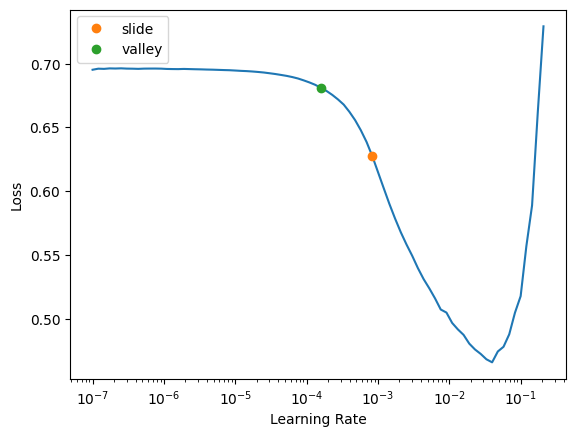

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(2,5.50e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.109903,0.104618,0.949084,02:27
1,0.100476,0.097700,0.951716,02:22


In [ ]:
learner.save("book-classifier-stage-0")

Path('models/book-classifier-stage-0.pth')

In [ ]:
learner.export("models/book-classifier-stage-0.pkl")

##Stage - 1

In [ ]:
# learner.load("book-classifier-stage-0")

In [ ]:
learner.unfreeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.00363078061491251, valley=3.630780702224001e-05)

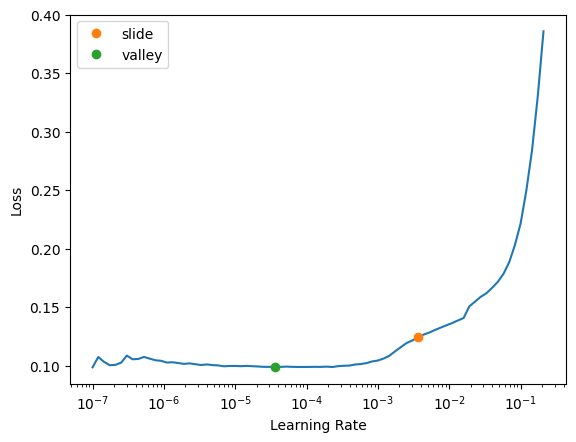

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(3,slice(2.75e-3, 4.25e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.116702,0.115743,0.944605,02:59
1,0.092205,0.096334,0.952153,03:00
2,0.076054,0.092349,0.955396,02:57


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
learner.save("book-classifier-stage-1")

Path('models/book-classifier-stage-1.pth')

In [ ]:
learner.export("models/book-classifier-stage-1.pkl")